### 2024 Assembly Election Analysis- Andhra Pradesh and Odisha

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/pc/OneDrive/Desktop/JUPITER NB/assembly.csv'

df = pd.read_csv(file_path, encoding='latin1')
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

df


,State,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,Andhra Pradesh,Achanta,56,SATYANARAYANA PITHANI,Telugu Desam,CHERUKUVADA SRI RANGANADHA RAJU,Yuvajana Sramika Rythu Congress Party,26554,Result Declared
1,Andhra Pradesh,Addanki,105,GOTTIPATI RAVI KUMAR,Telugu Desam,CHINNA HANIMIREDDY PANEM,Yuvajana Sramika Rythu Congress Party,24890,Result Declared
2,Andhra Pradesh,Adoni,146,DR. PARTHA SARATHI VALMIKI,Bharatiya Janata Party,Y. SAI PRASAD REDDY,Yuvajana Sramika Rythu Congress Party,18164,Result Declared
3,Andhra Pradesh,Allagadda,134,AKHILA PRIYA BHUMA,Telugu Desam,BRIJENDRA REDDY GANGULA (NANI),Yuvajana Sramika Rythu Congress Party,12037,Result Declared
4,Andhra Pradesh,Alur,147,B. VIRUPAKSHI,Yuvajana Sramika Rythu Congress Party,B. VEERABHADRA GOWD,Telugu Desam,2831,Result Declared
...,...,...,...,...,...,...,...,...,...
317,Odisha,Telkoi,20,DR. FAKIR MOHAN NAIK,Bharatiya Janata Party,MADHABA SARDAR,Biju Janata Dal,9439,Result Declared
318,Odisha,Tirtol,102,RAMAKANTA BHOI,Biju Janata Dal,RAJKISHORE BEHERA,Bharatiya Janata Party,28495,Result Declared
319,Odisha,Titlagarh,69,NABIN KUMAR JAIN,Bharatiya Janata Party,TUKUNI SAHU,Biju Janata Dal,17399,Result Declared
320,Odisha,Udala,31,BHASKAR MADHEI,Bharatiya Janata Party,SRINATH SOREN,Biju Janata Dal,6517,Result Declared


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               322 non-null    object
 1   Constituency        322 non-null    object
 2   Const. No.          322 non-null    int64 
 3   Leading Candidate   322 non-null    object
 4   Leading Party       322 non-null    object
 5   Trailing Candidate  322 non-null    object
 6   Trailing Party      322 non-null    object
 7   Margin              322 non-null    int64 
 8   Status              322 non-null    object
dtypes: int64(2), object(7)
memory usage: 22.8+ KB


In [8]:
df.nunique()

State                   2
Constituency          322
Const. No.            175
Leading Candidate     322
Leading Party           8
Trailing Candidate    322
Trailing Party          6
Margin                321
Status                  1
dtype: int64

### No of Seats In Andhra Pradesh & Odisha

In [12]:
x = df['State'].value_counts()
seats = pd.DataFrame(x).reset_index()
seats.columns = ['State', 'Total Seats']
seats

,State,Total Seats
0,Andhra Pradesh,175
1,Odisha,147


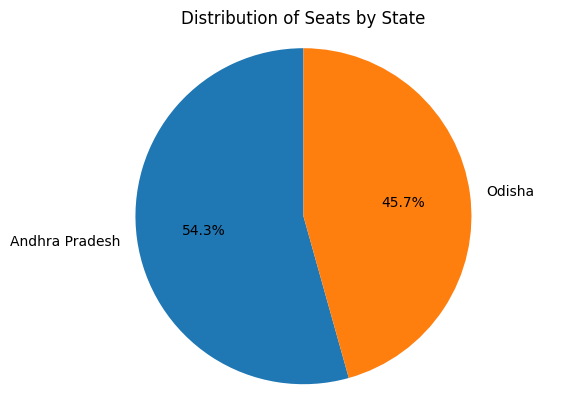

In [14]:
fig, ax = plt.subplots()
ax.pie(seats['Total Seats'], labels=seats['State'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')  

plt.title('Distribution of Seats by State')
plt.show()

#### ->The above Pie Chart shows that Andhra Pradesh has more seats than Odisha

### Party Performance - Total Seats and Vote Share

#### Comparing Parties from both Andhra Pradesh and Odisha based on total seats won

In [3]:
seats_won = df['Leading Party'].value_counts().reset_index()
seats_won.columns = ['Party', 'Seats Won']

total_votes = df['Margin'].sum()

partywise_votes = df.groupby('Leading Party')['Margin'].sum().reset_index()

partywise_votes['Vote Share (%)'] = (partywise_votes['Margin'] / total_votes) * 100

partywise_performance = pd.merge(seats_won, partywise_votes, left_on='Party', right_on='Leading Party')
partywise_performance = partywise_performance[['Party', 'Seats Won', 'Vote Share (%)']]

partywise_performance

,Party,Seats Won,Vote Share (%)
0,Telugu Desam,135,55.006204
1,Bharatiya Janata Party,86,18.541014
2,Biju Janata Dal,51,8.628336
3,Janasena Party,21,12.667164
4,Indian National Congress,14,2.150023
5,Yuvajana Sramika Rythu Congress Party,11,2.263399
6,Independent,3,0.445774
7,Communist Party of India (Marxist),1,0.298086


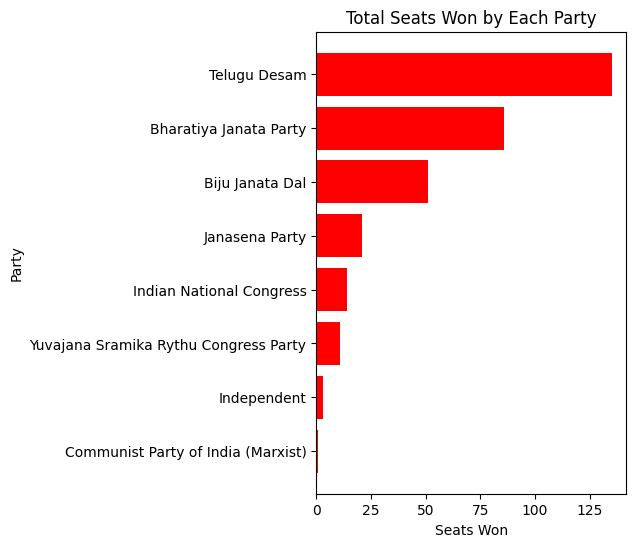

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 6))
plt.barh(partywise_performance['Party'], partywise_performance['Seats Won'], color='red')
plt.ylabel('Party')

plt.xlabel('Seats Won')
plt.title('Total Seats Won by Each Party')

plt.gca().invert_yaxis()

plt.show()


#### ->Above Bar Graph shows that Telugu Desam Party and Bharatiya Janata Party have secured most of the seats

### Top 5 Parties by Wins

#### In Andhra Pradesh

In [22]:
andhra_df = df[df['State']=='Andhra Pradesh']

andhra_df

,State,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,Andhra Pradesh,Achanta,56,SATYANARAYANA PITHANI,Telugu Desam,CHERUKUVADA SRI RANGANADHA RAJU,Yuvajana Sramika Rythu Congress Party,26554,Result Declared
1,Andhra Pradesh,Addanki,105,GOTTIPATI RAVI KUMAR,Telugu Desam,CHINNA HANIMIREDDY PANEM,Yuvajana Sramika Rythu Congress Party,24890,Result Declared
2,Andhra Pradesh,Adoni,146,DR. PARTHA SARATHI VALMIKI,Bharatiya Janata Party,Y. SAI PRASAD REDDY,Yuvajana Sramika Rythu Congress Party,18164,Result Declared
3,Andhra Pradesh,Allagadda,134,AKHILA PRIYA BHUMA,Telugu Desam,BRIJENDRA REDDY GANGULA (NANI),Yuvajana Sramika Rythu Congress Party,12037,Result Declared
4,Andhra Pradesh,Alur,147,B. VIRUPAKSHI,Yuvajana Sramika Rythu Congress Party,B. VEERABHADRA GOWD,Telugu Desam,2831,Result Declared
...,...,...,...,...,...,...,...,...,...
170,Andhra Pradesh,Visakhapatnam West,24,P.G.V.R.NAIDU(GANABABU),Telugu Desam,ADARI ANAND KUMAR,Yuvajana Sramika Rythu Congress Party,35184,Result Declared
171,Andhra Pradesh,Vizianagaram,18,ADITI VIJAYALAKSHMI GAJAPATHI RAJU PUSAPATI,Telugu Desam,KOLAGATLA VEERABHADRA SWAMY,Yuvajana Sramika Rythu Congress Party,60609,Result Declared
172,Andhra Pradesh,Yelamanchili,32,SUNDARAPU VIJAY KUMAR,Janasena Party,UPPALAPATI VENKATA RAMANAMURTHY RAJU,Yuvajana Sramika Rythu Congress Party,48956,Result Declared
173,Andhra Pradesh,Yemmiganur,144,B. JAYANAGESWARA REDDY,Telugu Desam,BUTTA RENUKA,Yuvajana Sramika Rythu Congress Party,15837,Result Declared


In [24]:
top_parties_ap = (
    andhra_df.groupby('Leading Party')
    .size()
    .reset_index(name='Seats Won')
    .sort_values(by='Seats Won', ascending=False)
    .head(5).reset_index(drop=True)
)
print("Top 5 parties by wins in Andhra Pradesh:")
top_parties_ap

Top 5 parties by wins in Andhra Pradesh:


,Leading Party,Seats Won
0,Telugu Desam,135
1,Janasena Party,21
2,Yuvajana Sramika Rythu Congress Party,11
3,Bharatiya Janata Party,8


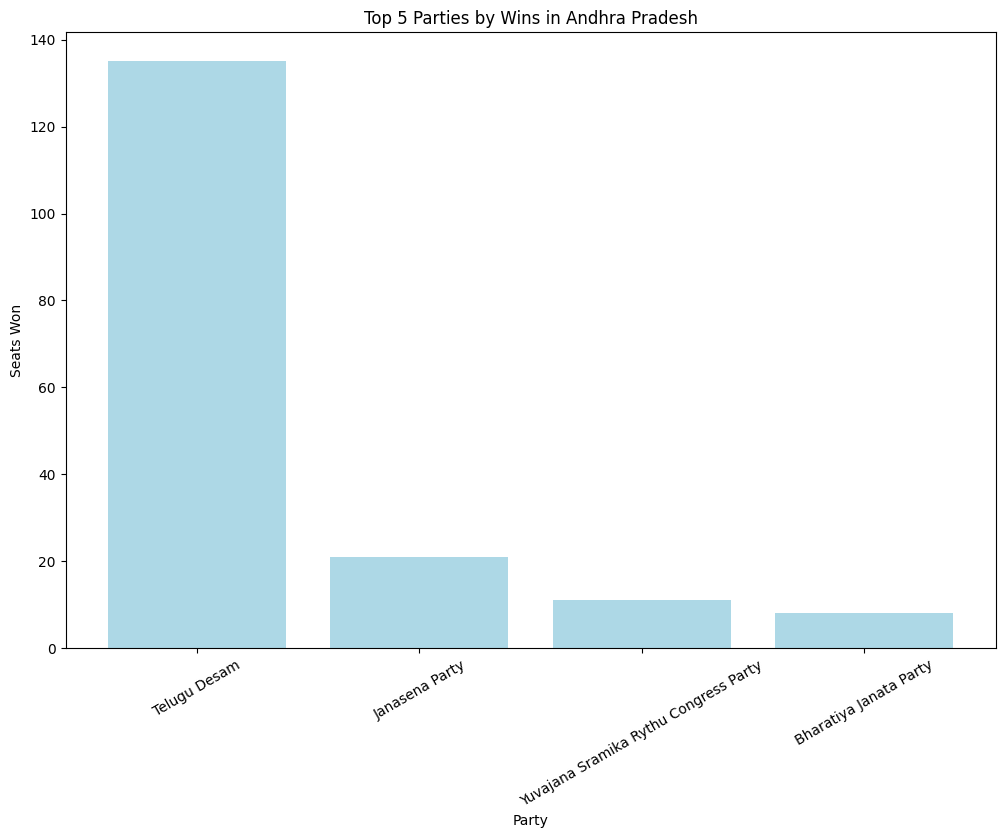

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(top_parties_ap['Leading Party'], top_parties_ap['Seats Won'],color='lightblue')

plt.title('Top 5 Parties by Wins in Andhra Pradesh')
plt.xlabel('Party')
plt.ylabel('Seats Won')

plt.xticks(rotation=30)
plt.show()


#### -> The Bar Graph shows that Telugu Desam Party is the Leading Party with highest seats. The Second Leading Party Janasena Party have very huge seats difference to Telugu Desam Party

#### In Odisha

In [28]:
odisha_df = df[df['State']=='Odisha']

odisha_df

,State,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
175,Odisha,Anandapur,22,ABHIMANYU SETHI,Biju Janata Dal,JAYADEV JENA,Indian National Congress,10966,Result Declared
176,Odisha,Angul,61,PRATAP CHANDRA PRADHAN,Bharatiya Janata Party,SANJUKTA SINGH,Biju Janata Dal,17433,Result Declared
177,Odisha,Aska,128,SAROJ KUMAR PADHI,Bharatiya Janata Party,MANJULA SWAIN,Biju Janata Dal,8059,Result Declared
178,Odisha,Athagarh,89,RANENDRA PRATAP SWAIN,Biju Janata Dal,ABHAYA KUMAR BARIK,Bharatiya Janata Party,3584,Result Declared
179,Odisha,Athamallik,63,NALINI KANTA PRADHAN,Biju Janata Dal,SANJEEB KUMAR SAHOO,Bharatiya Janata Party,16153,Result Declared
...,...,...,...,...,...,...,...,...,...
317,Odisha,Telkoi,20,DR. FAKIR MOHAN NAIK,Bharatiya Janata Party,MADHABA SARDAR,Biju Janata Dal,9439,Result Declared
318,Odisha,Tirtol,102,RAMAKANTA BHOI,Biju Janata Dal,RAJKISHORE BEHERA,Bharatiya Janata Party,28495,Result Declared
319,Odisha,Titlagarh,69,NABIN KUMAR JAIN,Bharatiya Janata Party,TUKUNI SAHU,Biju Janata Dal,17399,Result Declared
320,Odisha,Udala,31,BHASKAR MADHEI,Bharatiya Janata Party,SRINATH SOREN,Biju Janata Dal,6517,Result Declared


In [29]:
top_parties_od = (
    odisha_df.groupby('Leading Party')
    .size()
    .reset_index(name='Seats Won')
    .sort_values(by='Seats Won', ascending=False)
    .head(5).reset_index(drop=True)
)
print("Top 5 parties by wins in Andhra Pradesh:")
top_parties_od

Top 5 parties by wins in Andhra Pradesh:


,Leading Party,Seats Won
0,Bharatiya Janata Party,78
1,Biju Janata Dal,51
2,Indian National Congress,14
3,Independent,3
4,Communist Party of India (Marxist),1


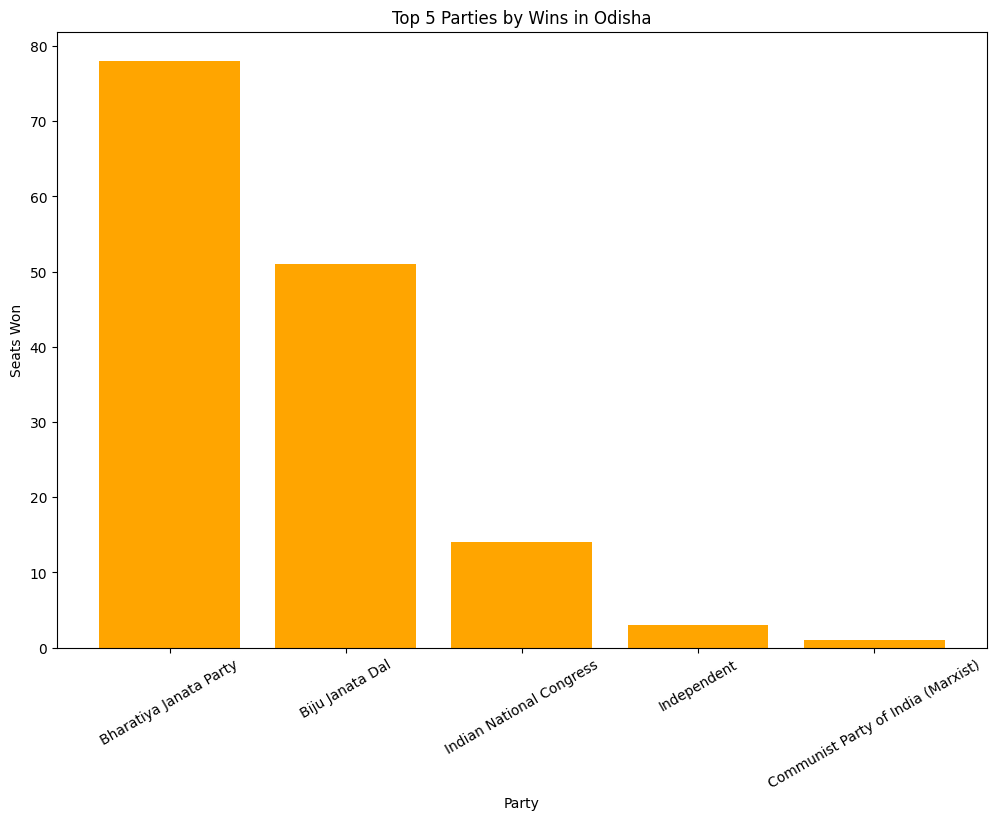

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(top_parties_od['Leading Party'], top_parties_od['Seats Won'],color='orange')

plt.title('Top 5 Parties by Wins in Odisha')
plt.xlabel('Party')
plt.ylabel('Seats Won')

plt.xticks(rotation=30)
plt.show()

#### -> The Bar Graph shows that Bharatiya Janata Party is the Leading Party with highest seats. The Second Leading Party Biju Janata Party have Less seats difference to Telugu Desam Party

### Top 10 Candidates by Margin

#### In Andhra Pradesh

In [36]:
andhra_df = df[df['State']=='Andhra Pradesh']

andhra_df

,State,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,Andhra Pradesh,Achanta,56,SATYANARAYANA PITHANI,Telugu Desam,CHERUKUVADA SRI RANGANADHA RAJU,Yuvajana Sramika Rythu Congress Party,26554,Result Declared
1,Andhra Pradesh,Addanki,105,GOTTIPATI RAVI KUMAR,Telugu Desam,CHINNA HANIMIREDDY PANEM,Yuvajana Sramika Rythu Congress Party,24890,Result Declared
2,Andhra Pradesh,Adoni,146,DR. PARTHA SARATHI VALMIKI,Bharatiya Janata Party,Y. SAI PRASAD REDDY,Yuvajana Sramika Rythu Congress Party,18164,Result Declared
3,Andhra Pradesh,Allagadda,134,AKHILA PRIYA BHUMA,Telugu Desam,BRIJENDRA REDDY GANGULA (NANI),Yuvajana Sramika Rythu Congress Party,12037,Result Declared
4,Andhra Pradesh,Alur,147,B. VIRUPAKSHI,Yuvajana Sramika Rythu Congress Party,B. VEERABHADRA GOWD,Telugu Desam,2831,Result Declared
...,...,...,...,...,...,...,...,...,...
170,Andhra Pradesh,Visakhapatnam West,24,P.G.V.R.NAIDU(GANABABU),Telugu Desam,ADARI ANAND KUMAR,Yuvajana Sramika Rythu Congress Party,35184,Result Declared
171,Andhra Pradesh,Vizianagaram,18,ADITI VIJAYALAKSHMI GAJAPATHI RAJU PUSAPATI,Telugu Desam,KOLAGATLA VEERABHADRA SWAMY,Yuvajana Sramika Rythu Congress Party,60609,Result Declared
172,Andhra Pradesh,Yelamanchili,32,SUNDARAPU VIJAY KUMAR,Janasena Party,UPPALAPATI VENKATA RAMANAMURTHY RAJU,Yuvajana Sramika Rythu Congress Party,48956,Result Declared
173,Andhra Pradesh,Yemmiganur,144,B. JAYANAGESWARA REDDY,Telugu Desam,BUTTA RENUKA,Yuvajana Sramika Rythu Congress Party,15837,Result Declared


In [40]:
top_candidates = andhra_df.nlargest(10, 'Margin')[['Leading Candidate','Margin','Leading Party']]
top_candidates.reset_index(drop=True)

,Leading Candidate,Margin,Leading Party
0,PALLA SRINIVAS RAO,95235,Telugu Desam
1,GANTA SRINIVASA RAO,92401,Telugu Desam
2,NARA LOKESH,91413,Telugu Desam
3,PANCHAKARLA RAMESH BABU,81870,Janasena Party
4,NARAYANA PONGURU,72489,Telugu Desam
5,ARIMILLI RADHA KRISHNA,72121,Telugu Desam
6,PANTAM VENKATESWARA RAO (PANTAM NANAJI),72040,Janasena Party
7,ADIREDDY SRINIVAS,71404,Telugu Desam
8,RAMAKRISHNA BABU VELAGAPUDI,70877,Telugu Desam
9,KONIDALA PAWAN KALYAN,70279,Janasena Party


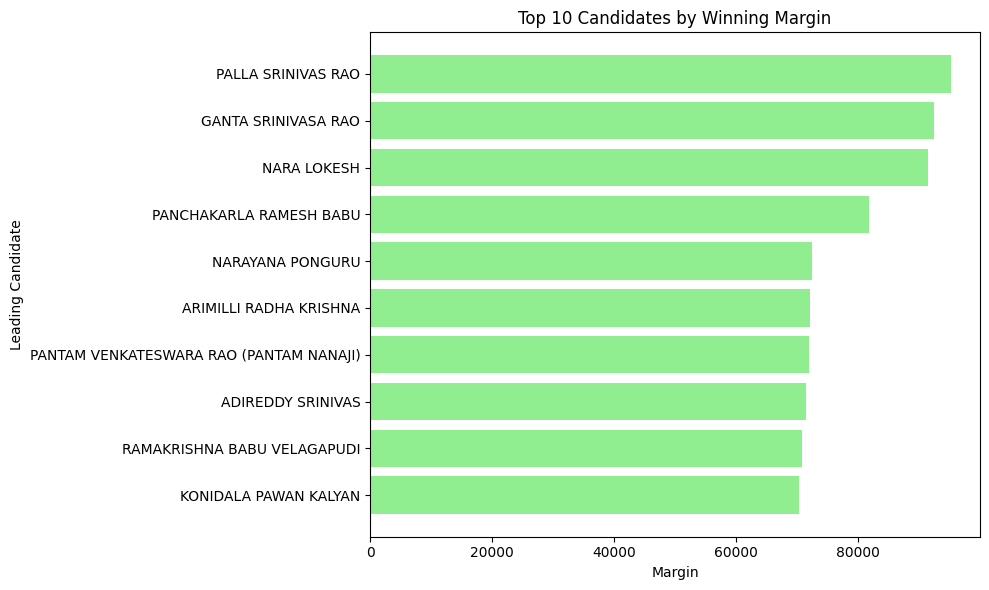

In [41]:
plt.figure(figsize=(10, 6))
plt.barh(top_candidates['Leading Candidate'],top_candidates['Margin'], color='lightgreen')
plt.xlabel('Margin')
plt.ylabel('Leading Candidate')
plt.title('Top 10 Candidates by Winning Margin')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### -> The Bar Graph shows that Palla Srinivas Rao, Ganta Srinivas Rao and Nara Lokesh are the Candidates with Highest Votes 

#### In Odisha

In [42]:
odisha_df = df[df['State']=='Odisha']

odisha_df

,State,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
175,Odisha,Anandapur,22,ABHIMANYU SETHI,Biju Janata Dal,JAYADEV JENA,Indian National Congress,10966,Result Declared
176,Odisha,Angul,61,PRATAP CHANDRA PRADHAN,Bharatiya Janata Party,SANJUKTA SINGH,Biju Janata Dal,17433,Result Declared
177,Odisha,Aska,128,SAROJ KUMAR PADHI,Bharatiya Janata Party,MANJULA SWAIN,Biju Janata Dal,8059,Result Declared
178,Odisha,Athagarh,89,RANENDRA PRATAP SWAIN,Biju Janata Dal,ABHAYA KUMAR BARIK,Bharatiya Janata Party,3584,Result Declared
179,Odisha,Athamallik,63,NALINI KANTA PRADHAN,Biju Janata Dal,SANJEEB KUMAR SAHOO,Bharatiya Janata Party,16153,Result Declared
...,...,...,...,...,...,...,...,...,...
317,Odisha,Telkoi,20,DR. FAKIR MOHAN NAIK,Bharatiya Janata Party,MADHABA SARDAR,Biju Janata Dal,9439,Result Declared
318,Odisha,Tirtol,102,RAMAKANTA BHOI,Biju Janata Dal,RAJKISHORE BEHERA,Bharatiya Janata Party,28495,Result Declared
319,Odisha,Titlagarh,69,NABIN KUMAR JAIN,Bharatiya Janata Party,TUKUNI SAHU,Biju Janata Dal,17399,Result Declared
320,Odisha,Udala,31,BHASKAR MADHEI,Bharatiya Janata Party,SRINATH SOREN,Biju Janata Dal,6517,Result Declared


In [43]:
top_candidates = odisha_df.nlargest(10, 'Margin')[['Leading Candidate','Margin','Leading Party']]
top_candidates.reset_index(drop=True)

,Leading Candidate,Margin,Leading Party
0,BISWA RANJAN MALLICK,51465,Biju Janata Dal
1,PRADIP KUMAR SAHU S/O-LAXMIDHAR SAHU,47814,Biju Janata Dal
2,SANATAN MAHAKUD,39994,Biju Janata Dal
3,AKHILA CHANDRA NAIK,37979,Bharatiya Janata Party
4,SANATAN BIJULI,37387,Bharatiya Janata Party
5,GANESWAR BEHERA,35418,Biju Janata Dal
6,GANESH RAM SINGKHUNTIA,34667,Bharatiya Janata Party
7,SANJALI MURMU,34476,Bharatiya Janata Party
8,DURGA PRASAN NAYAK,33526,Bharatiya Janata Party
9,DR. KRUSHNA CHANDRA MAHAPATRA,33270,Bharatiya Janata Party


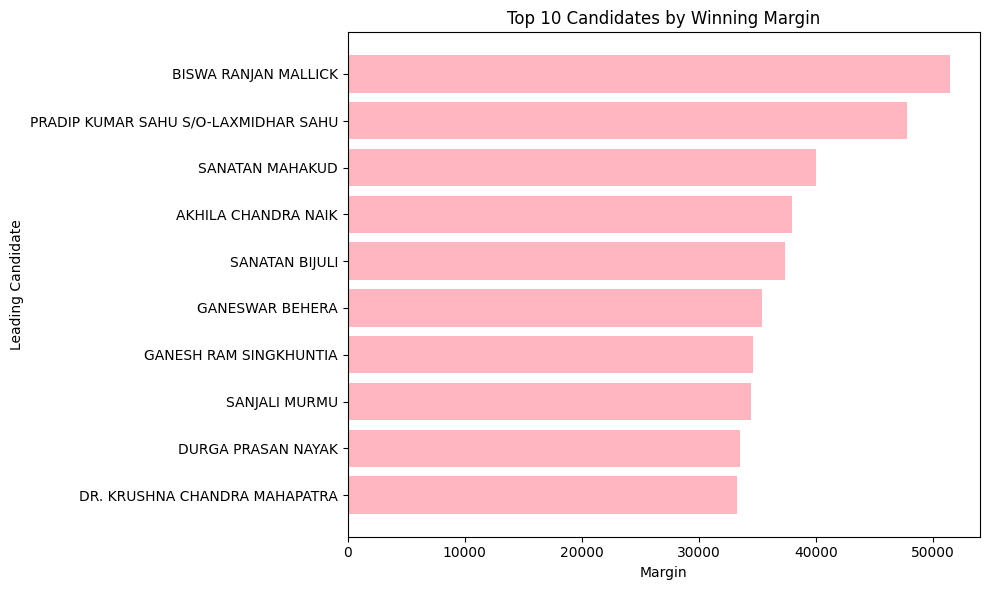

In [46]:
plt.figure(figsize=(10, 6))
plt.barh(top_candidates['Leading Candidate'],top_candidates['Margin'], color='lightpink')
plt.xlabel('Margin')
plt.ylabel('Leading Candidate')
plt.title('Top 10 Candidates by Winning Margin')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### -> The Bar Graph shows that Biswa Ranjan Mallick, Pradip Kumar and Sanatan Mahakud are the Candidates with Highest Votes

### Comparision of Votes for Chandrababu naidu nara, Pawan Kalyan and YS Jagan mohan reddy

In [47]:
andhra_df = df[df['State']=='Andhra Pradesh']

andhra_df

,State,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,Andhra Pradesh,Achanta,56,SATYANARAYANA PITHANI,Telugu Desam,CHERUKUVADA SRI RANGANADHA RAJU,Yuvajana Sramika Rythu Congress Party,26554,Result Declared
1,Andhra Pradesh,Addanki,105,GOTTIPATI RAVI KUMAR,Telugu Desam,CHINNA HANIMIREDDY PANEM,Yuvajana Sramika Rythu Congress Party,24890,Result Declared
2,Andhra Pradesh,Adoni,146,DR. PARTHA SARATHI VALMIKI,Bharatiya Janata Party,Y. SAI PRASAD REDDY,Yuvajana Sramika Rythu Congress Party,18164,Result Declared
3,Andhra Pradesh,Allagadda,134,AKHILA PRIYA BHUMA,Telugu Desam,BRIJENDRA REDDY GANGULA (NANI),Yuvajana Sramika Rythu Congress Party,12037,Result Declared
4,Andhra Pradesh,Alur,147,B. VIRUPAKSHI,Yuvajana Sramika Rythu Congress Party,B. VEERABHADRA GOWD,Telugu Desam,2831,Result Declared
...,...,...,...,...,...,...,...,...,...
170,Andhra Pradesh,Visakhapatnam West,24,P.G.V.R.NAIDU(GANABABU),Telugu Desam,ADARI ANAND KUMAR,Yuvajana Sramika Rythu Congress Party,35184,Result Declared
171,Andhra Pradesh,Vizianagaram,18,ADITI VIJAYALAKSHMI GAJAPATHI RAJU PUSAPATI,Telugu Desam,KOLAGATLA VEERABHADRA SWAMY,Yuvajana Sramika Rythu Congress Party,60609,Result Declared
172,Andhra Pradesh,Yelamanchili,32,SUNDARAPU VIJAY KUMAR,Janasena Party,UPPALAPATI VENKATA RAMANAMURTHY RAJU,Yuvajana Sramika Rythu Congress Party,48956,Result Declared
173,Andhra Pradesh,Yemmiganur,144,B. JAYANAGESWARA REDDY,Telugu Desam,BUTTA RENUKA,Yuvajana Sramika Rythu Congress Party,15837,Result Declared


,Candidate,Constituency,vote_margin
0,CHANDRABABU NAIDU NARA,Kuppam,48006
1,KONIDALA PAWAN KALYAN,Pithapuram,70279
2,YS JAGAN MOHAN REDDY,Pulivendla,61687


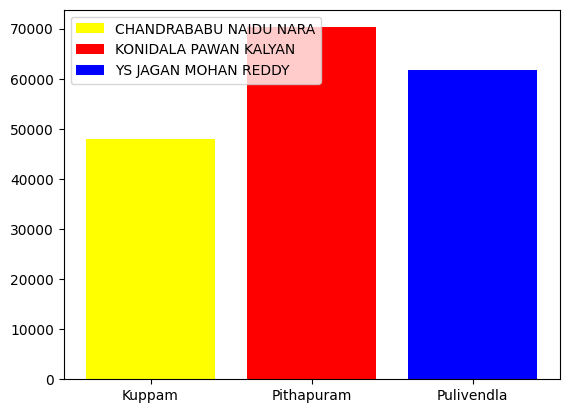

In [49]:
babu = andhra_df.loc[df['Leading Candidate'] == 'CHANDRABABU NAIDU NARA']
pawan = andhra_df.loc[df['Leading Candidate'] == 'KONIDALA PAWAN KALYAN']
jagan = andhra_df.loc[df['Leading Candidate'] == 'YS JAGAN MOHAN REDDY']


babu_votes = babu['Margin'].values
pawan_votes = pawan['Margin'].values[0]
jagan_votes = jagan['Margin'].values[0]


data_to_plot = pd.DataFrame({
    'Candidate' : ['CHANDRABABU NAIDU NARA','KONIDALA PAWAN KALYAN','YS JAGAN MOHAN REDDY'],
    'Constituency' : list(babu['Constituency']) + [pawan['Constituency'].values[0], jagan['Constituency'].values[0]],
    'vote_margin' : list(babu_votes) + [pawan_votes, jagan_votes]
})


fig, ax = plt.subplots()
ax.bar(data_to_plot.Constituency, data_to_plot.vote_margin, label = data_to_plot.Candidate, color = ['yellow','red', 'blue'])
ax.legend()
data_to_plot

#### Pawan Kalyan Secured more Votes than ChandraBabu Naidu and YS Jagan Mohan

### Comparision of Votes for Mohan Charan Majhi and Naveen Patnaik

In [7]:
odisha_df = df[df['State']=='Odisha']

odisha_df.reset_index(drop=True)

,State,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,Odisha,Anandapur,22,ABHIMANYU SETHI,Biju Janata Dal,JAYADEV JENA,Indian National Congress,10966,Result Declared
1,Odisha,Angul,61,PRATAP CHANDRA PRADHAN,Bharatiya Janata Party,SANJUKTA SINGH,Biju Janata Dal,17433,Result Declared
2,Odisha,Aska,128,SAROJ KUMAR PADHI,Bharatiya Janata Party,MANJULA SWAIN,Biju Janata Dal,8059,Result Declared
3,Odisha,Athagarh,89,RANENDRA PRATAP SWAIN,Biju Janata Dal,ABHAYA KUMAR BARIK,Bharatiya Janata Party,3584,Result Declared
4,Odisha,Athamallik,63,NALINI KANTA PRADHAN,Biju Janata Dal,SANJEEB KUMAR SAHOO,Bharatiya Janata Party,16153,Result Declared
...,...,...,...,...,...,...,...,...,...
142,Odisha,Telkoi,20,DR. FAKIR MOHAN NAIK,Bharatiya Janata Party,MADHABA SARDAR,Biju Janata Dal,9439,Result Declared
143,Odisha,Tirtol,102,RAMAKANTA BHOI,Biju Janata Dal,RAJKISHORE BEHERA,Bharatiya Janata Party,28495,Result Declared
144,Odisha,Titlagarh,69,NABIN KUMAR JAIN,Bharatiya Janata Party,TUKUNI SAHU,Biju Janata Dal,17399,Result Declared
145,Odisha,Udala,31,BHASKAR MADHEI,Bharatiya Janata Party,SRINATH SOREN,Biju Janata Dal,6517,Result Declared


,Candidate,Constituency,vote_margin
0,NAVEEN PATNAIK,Hinjili,4636
1,MOHAN CHARAN MAJHI,Keonjhar,11577


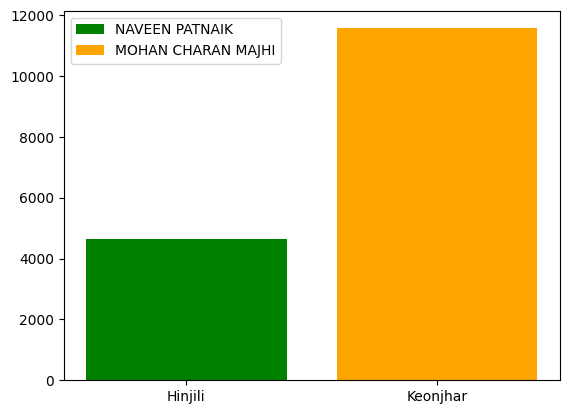

In [9]:
naveen = odisha_df.loc[df['Leading Candidate'] == 'NAVEEN PATNAIK']
mohan = odisha_df.loc[df['Leading Candidate'] == 'MOHAN CHARAN MAJHI']

naveen_votes = naveen['Margin'].values
mohan_votes = mohan['Margin'].values[0]

data_to_plot = pd.DataFrame({
    'Candidate' : ['NAVEEN PATNAIK','MOHAN CHARAN MAJHI'],
    'Constituency' : list(naveen['Constituency']) + [mohan['Constituency'].values[0]],
    'vote_margin' : list(naveen_votes) + [mohan_votes]
})


fig, ax = plt.subplots()
ax.bar(data_to_plot.Constituency, data_to_plot.vote_margin, label = data_to_plot.Candidate, color = ['green','orange'])
ax.legend()
data_to_plot

#### Mohan Charan Majhi Secured more Votes than Naveen Patnaik 